# MMCV 세팅

In [ ]:
import torch

print(torch.__version__)

1.12.1+cu113


In [ ]:
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.1/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.1/index.html
     |████████████████████████████████| 575 kB 5.1 MB/s 
     |████████████████████████████████| 190 kB 64.1 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.6.2-cp37-cp37m-linux_x86_64.whl size=24339107 sha256=5400ab74584a59e95f958ad365d9426339e8563e243863aa3141d17b66d8fa69
  Stored in directory: /root/.cache/pip/wheels/51/0a/2c/990e1866b4c28e9a70ae3a0a304eeaf4711e85a87c647b8b79
Successfully built mmcv-full


In [ ]:
# mmdetection git clone

# !cd /content/drive/MyDrive
# !git clone https://github.com/open-mmlab/mmdetection.git
# !cd mmdetection; python setup.py install

In [ ]:
!cd /content/drive/MyDrive/mmdetection; python setup.py install

running install
running bdist_egg
running egg_info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'mmdet.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mmdet
copying build/lib/mmdet/version.py -> build/bdist.linux-x86_64/egg/mmdet
copying build/lib/mmdet/__init__.py -> build/bdist.linux-x86_64/egg/mmdet
creating build/bdist.linux-x86_64/egg/mmdet/utils
copying build/lib/mmdet/utils/split_batch.py -> build/bdist.linux-x86_64/egg/mmdet/utils
copying build/lib/mmdet/utils/replace_cfg_vals.py -> build/bdist.linux-x86_64/egg/mmdet/utils
copying build/lib/mmdet/utils/misc.py -> build/bdist.linux-x86_64/egg

In [ ]:
# mmsegmentation git clone

# !git clone https://github.com/open-mmlab/mmsegmentation.git
# !cd mmdetection; python setup.py install

## 1. Faster RCNN

In [ ]:
from mmdet.apis import init_detector, inference_detector
import mmcv
import os

In [ ]:
# colab 버전은 아래 명령어로 ballnfish_classes.txt 를 수정합니다. 
with open('/content/drive/MyDrive/StagnantWaterDetection/WATER_Dataset_whole/labels.txt', "w") as f:
    f.write("water\n")
    f.write("stone\n")

!cat /content/drive/MyDrive/StagnantWaterDetection/WATER_Dataset/labels.txt

water
stone


In [ ]:
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset

@DATASETS.register_module(force=True)
class WATERDataset(CocoDataset):
  CLASSES = ('water', 'stone') 

In [ ]:
config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [ ]:
!pwd

/content


In [ ]:
!cd /content/mmdetection; mkdir checkpoints
!wget -O /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2022-09-28 09:32:19--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.89.140.65
Connecting to download.openmmlab.com (download.openmmlab.com)|47.89.140.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

/content/mmdetectio 100%[===================>] 159.54M  8.09MB/s    in 20s     

2022-09-28 09:32:40 (7.90 MB/s) - ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [ ]:
!ls -lia /content/mmdetection/checkpoints

total 163376
5246077 drwxr-xr-x  2 root root      4096 Sep 28 09:32 .
5243023 drwxr-xr-x 19 root root      4096 Sep 28 09:32 ..
5246078 -rw-r--r--  1 root root 167287506 Nov  2  2021 faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [ ]:
from mmcv import Config

cfg = Config.fromfile(config_file)
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

In [ ]:
from mmdet.apis import set_random_seed

# dataset에 대한 환경 파라미터 수정. 
cfg.dataset_type = 'WATERDataset'
cfg.data_root = '/content/drive/MyDrive/StagnantWaterDetection/WATER_Dataset_whole/'

# train, val, test dataset에 대한 type, data_root, ann_file, img_prefix 환경 파라미터 수정. 
cfg.data.train.type = 'WATERDataset'
cfg.data.train.data_root = '/content/drive/MyDrive/StagnantWaterDetection/WATER_Dataset_whole/'
cfg.data.train.ann_file = 'train.json'
cfg.data.train.img_prefix = '' # JPEGImages

cfg.data.val.type = 'WATERDataset'
cfg.data.val.data_root = '/content/drive/MyDrive/StagnantWaterDetection/WATER_Dataset_whole/'
cfg.data.val.ann_file = 'val.json'
cfg.data.val.img_prefix = ''

cfg.data.test.type = 'WATERDataset'
cfg.data.test.data_root = '/content/drive/MyDrive/StagnantWaterDetection/WATER_Dataset_whole/'
cfg.data.test.ann_file = 'test.json'
cfg.data.test.img_prefix = ''

# class의 갯수 수정. 
cfg.model.roi_head.bbox_head.num_classes = 2
# pretrained 모델
cfg.load_from = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# 학습 weight 파일로 로그를 저장하기 위한 디렉토리 설정. 
cfg.work_dir = './tutorial_exps'

# 학습율 변경 환경 파라미터 설정. 
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# CocoDataset의 경우 metric을 bbox로 설정해야 함.(mAP아님. bbox로 설정하면 mAP를 iou threshold를 0.5 ~ 0.95까지 변경하면서 측정)
cfg.evaluation.metric = ['bbox', 'segm'] # segm이 없다고 나옴. faster RCNN으로 segmentation 불가능?!
cfg.evaluation.interval = 12
cfg.checkpoint_config.interval = 12

# 두번 config를 로드하면 lr_config의 policy가 사라지는 오류로 인하여 설정. 
cfg.lr_config.policy='step'
# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
# ConfigDict' object has no attribute 'device 오류 발생시 반드시 설정 필요. https://github.com/open-mmlab/mmdetection/issues/7901
cfg.device='cuda'

In [ ]:
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

In [ ]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# train용 Dataset 생성. 
datasets = [build_dataset(cfg.data.train)]

loading annotations into memory...
Done (t=0.10s)
creating index...
index created!


In [ ]:
print(datasets[0])
# datasets[0].__dict__ 로 모든 self variables의 key와 value값을 볼 수 있음. 
datasets[0].__dict__.keys()


WATERDataset Train dataset with number of images 653, and instance counts: 
+-----------+-------+-----------+-------+----------+-------+----------+-------+----------+-------+
| category  | count | category  | count | category | count | category | count | category | count |
+-----------+-------+-----------+-------+----------+-------+----------+-------+----------+-------+
|           |       |           |       |          |       |          |       |          |       |
| 0 [water] | 1886  | 1 [stone] | 1855  |          |       |          |       |          |       |
+-----------+-------+-----------+-------+----------+-------+----------+-------+----------+-------+


dict_keys(['ann_file', 'data_root', 'img_prefix', 'seg_prefix', 'proposal_file', 'test_mode', 'filter_empty_gt', 'file_client', 'CLASSES', 'coco', 'cat_ids', 'cat2label', 'img_ids', 'data_infos', 'proposals', 'flag', 'pipeline'])

In [ ]:
datasets[0].data_infos

[{'license': 0,
  'url': None,
  'file_name': 'JPEGImages/00001704.jpg',
  'height': 720,
  'width': 1280,
  'date_captured': None,
  'id': 0,
  'filename': 'JPEGImages/00001704.jpg'},
 {'license': 0,
  'url': None,
  'file_name': 'JPEGImages/00000816.jpg',
  'height': 720,
  'width': 1280,
  'date_captured': None,
  'id': 1,
  'filename': 'JPEGImages/00000816.jpg'},
 {'license': 0,
  'url': None,
  'file_name': 'JPEGImages/00001641.jpg',
  'height': 720,
  'width': 1280,
  'date_captured': None,
  'id': 2,
  'filename': 'JPEGImages/00001641.jpg'},
 {'license': 0,
  'url': None,
  'file_name': 'JPEGImages/00000729.jpg',
  'height': 720,
  'width': 1280,
  'date_captured': None,
  'id': 3,
  'filename': 'JPEGImages/00000729.jpg'},
 {'license': 0,
  'url': None,
  'file_name': 'JPEGImages/00001092.jpg',
  'height': 720,
  'width': 1280,
  'date_captured': None,
  'id': 4,
  'filename': 'JPEGImages/00001092.jpg'},
 {'license': 0,
  'url': None,
  'file_name': 'JPEGImages/00001587.jpg',
  

In [ ]:
datasets[0].pipeline

Compose(
    LoadImageFromFile(to_float32=False, color_type='color', channel_order='bgr', file_client_args={'backend': 'disk'})
    LoadAnnotations(with_bbox=True, with_label=True, with_mask=False, with_seg=False, poly2mask=True, file_client_args={'backend': 'disk'})
    Resize(img_scale=[(1333, 800)], multiscale_mode=range, ratio_range=None, keep_ratio=True, bbox_clip_border=True)
    RandomFlip(flip_ratio=0.5)
    Normalize(mean=[123.675 116.28  103.53 ], std=[58.395 57.12  57.375], to_rgb=True)
    Pad(size=None, size_divisor=32, pad_to_square=False, pad_val={'img': 0, 'masks': 0, 'seg': 255})
    DefaultFormatBundle(img_to_float=True)
    Collect(keys=['img', 'gt_bboxes', 'gt_labels'], meta_keys=('filename', 'ori_filename', 'ori_shape', 'img_shape', 'pad_shape', 'scale_factor', 'flip', 'flip_direction', 'img_norm_cfg'))
)

In [ ]:
model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
model.CLASSES = datasets[0].CLASSES
print(model.CLASSES)

('water', 'stone')


In [ ]:
!pwd

/content


In [ ]:
import os.path as osp
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
# epochs는 config의 runner 파라미터로 지정됨. 기본 12회 
train_detector(model, datasets, cfg, distributed=False, validate=True)

2022-09-28 09:46:05,578 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2022-09-28 09:46:05,600 - mmdet - INFO - load checkpoint from local path: /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
2022-09-28 09:46:05,754 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([3, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([3]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([8, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is 

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


2022-09-28 09:46:18,689 - mmdet - INFO - Epoch [1][10/327]	lr: 2.500e-03, eta: 1:23:35, time: 1.281, data_time: 0.302, memory: 3664, loss_rpn_cls: 0.2045, loss_rpn_bbox: 0.0409, loss_cls: 0.3184, acc: 92.1094, loss_bbox: 0.1079, loss: 0.6717
2022-09-28 09:46:22,111 - mmdet - INFO - Epoch [1][20/327]	lr: 2.500e-03, eta: 0:52:50, time: 0.343, data_time: 0.044, memory: 3664, loss_rpn_cls: 0.0866, loss_rpn_bbox: 0.0424, loss_cls: 0.2408, acc: 94.0723, loss_bbox: 0.2022, loss: 0.5720
2022-09-28 09:46:25,769 - mmdet - INFO - Epoch [1][30/327]	lr: 2.500e-03, eta: 0:43:02, time: 0.366, data_time: 0.050, memory: 3664, loss_rpn_cls: 0.0641, loss_rpn_bbox: 0.0540, loss_cls: 0.2524, acc: 91.6699, loss_bbox: 0.2981, loss: 0.6685
2022-09-28 09:46:29,657 - mmdet - INFO - Epoch [1][40/327]	lr: 2.500e-03, eta: 0:38:29, time: 0.389, data_time: 0.102, memory: 3664, loss_rpn_cls: 0.0512, loss_rpn_bbox: 0.0435, loss_cls: 0.2292, acc: 91.4941, loss_bbox: 0.3022, loss: 0.6260
2022-09-28 09:46:33,681 - mmdet 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 83/83, 6.0 task/s, elapsed: 14s, ETA:     0s

2022-09-28 10:08:52,446 - mmdet - INFO - Evaluating segm...


KeyError: ignored

/usr/local/lib/python3.7/dist-packages/mmdet-2.25.2-py3.7.egg/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


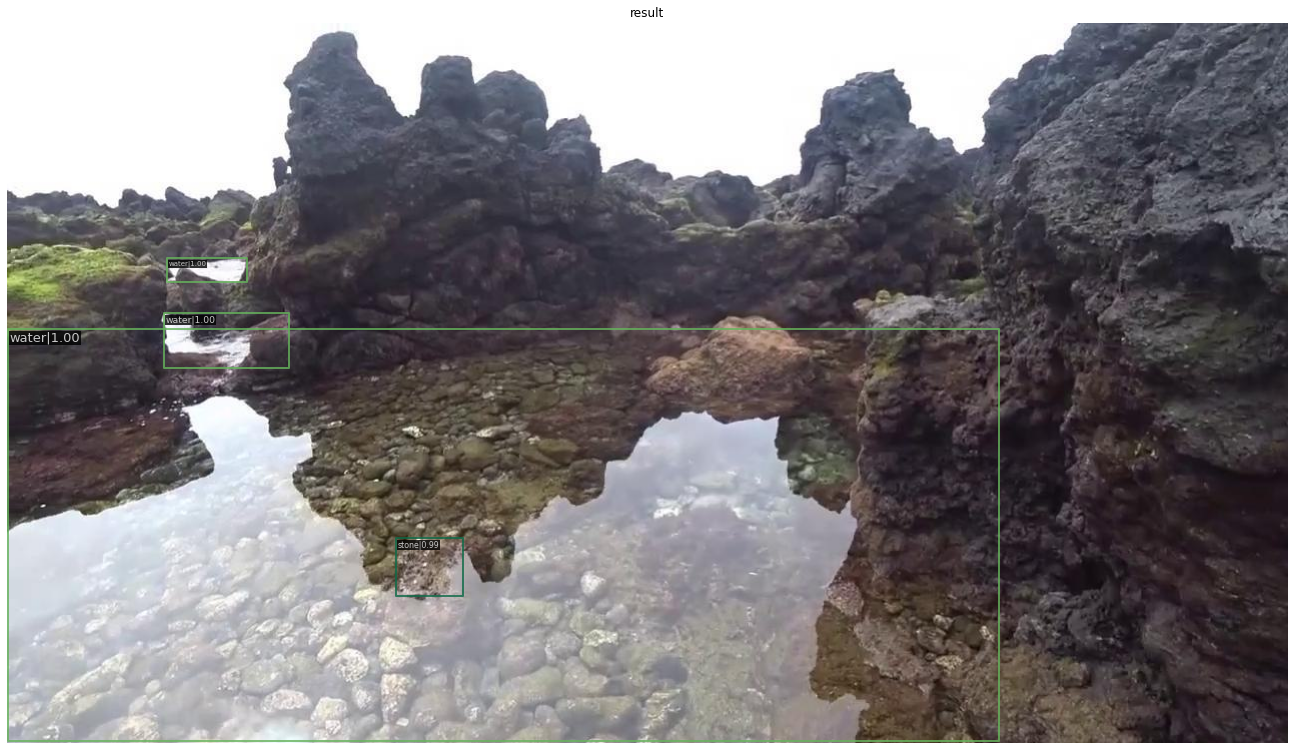

In [ ]:
import cv2
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# train 사진 확인
img = cv2.imread('/content/drive/MyDrive/StagnantWaterDetection/WATER_Dataset_whole/JPEGImages/00000999.jpg')

model.cfg = cfg

result = inference_detector(model, img)
show_result_pyplot(model, img, result)

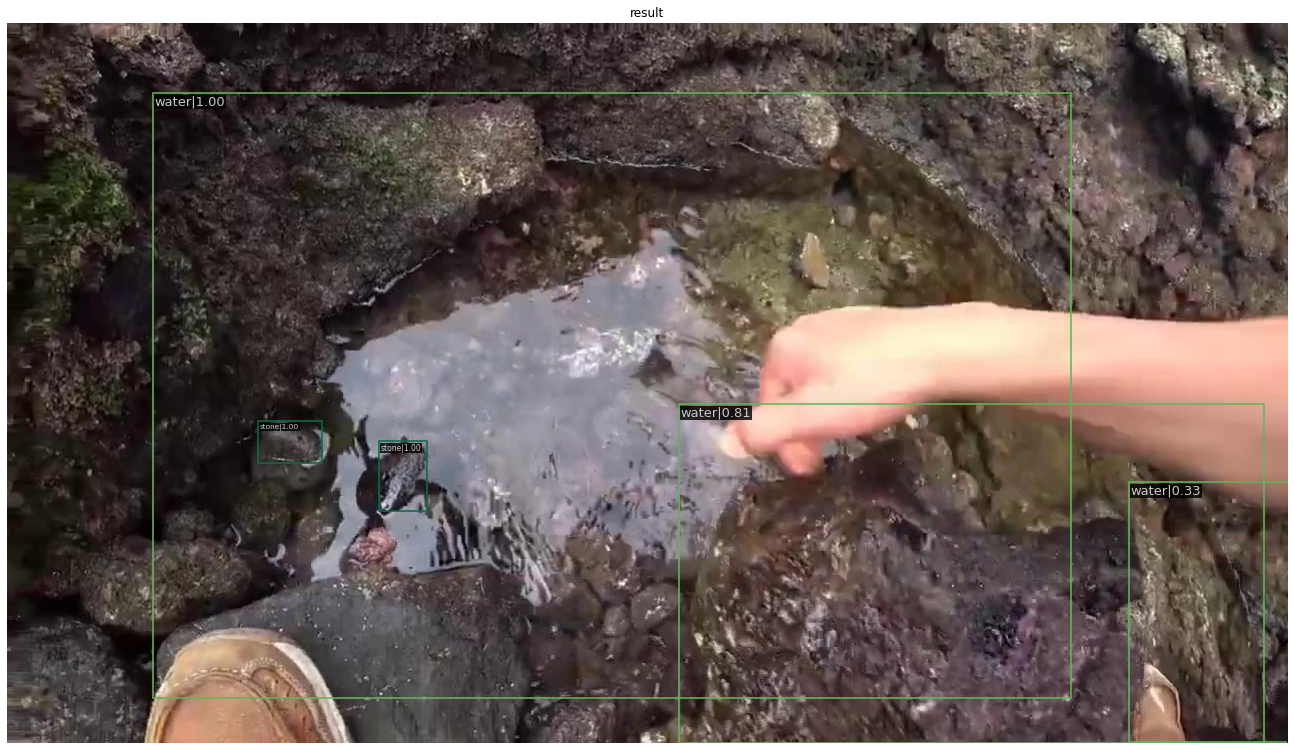

In [ ]:
# validation 사진 확인
img = cv2.imread('/content/drive/MyDrive/StagnantWaterDetection/WATER_Dataset_whole/JPEGImages/00002001.jpg')

model.cfg = cfg

result = inference_detector(model, img)
show_result_pyplot(model, img, result)

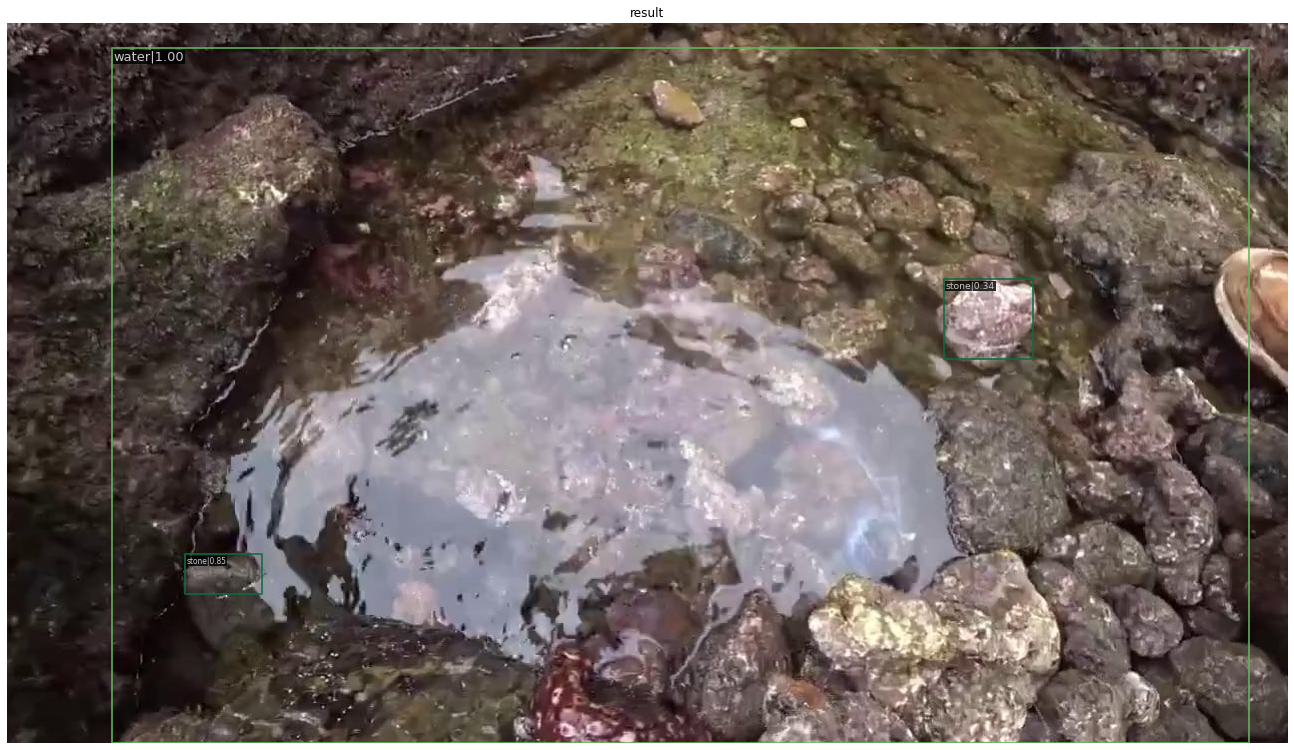

In [ ]:
# test 사진 확인
img = cv2.imread('/content/drive/MyDrive/StagnantWaterDetection/WATER_Dataset_whole/JPEGImages/00002460.jpg')

model.cfg = cfg

result = inference_detector(model, img)
show_result_pyplot(model, img, result)

In [ ]:
### 아래는 런타임 다시 시작 후 실행

from mmcv import Config
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset
from mmdet.apis import set_random_seed

@DATASETS.register_module(force=True)
class WATERDataset(CocoDataset):
  CLASSES = ('water', 'stone') 

config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

cfg = Config.fromfile(config_file)

# dataset에 대한 환경 파라미터 수정. 
cfg.dataset_type = 'WATERDataset'
cfg.data_root = '/content/drive/MyDrive/StagnantWaterDetection/WATER_Dataset_whole/'

# train, val, test dataset에 대한 type, data_root, ann_file, img_prefix 환경 파라미터 수정. 
cfg.data.train.type = 'WATERDataset'
cfg.data.train.data_root = '/content/drive/MyDrive/StagnantWaterDetection/WATER_Dataset_whole/'
cfg.data.train.ann_file = 'train.json'
cfg.data.train.img_prefix = ''

cfg.data.val.type = 'WATERDataset'
cfg.data.val.data_root = '/content/drive/MyDrive/StagnantWaterDetection/WATER_Dataset_whole/'
cfg.data.val.ann_file = 'val.json'
cfg.data.val.img_prefix = ''

cfg.data.test.type = 'WATERDataset'
cfg.data.test.data_root = '/content/drive/MyDrive/StagnantWaterDetection/WATER_Dataset_whole/'
cfg.data.test.ann_file = 'test.json'
cfg.data.test.img_prefix = ''

# class의 갯수 수정. 
cfg.model.roi_head.bbox_head.num_classes = 2
# pretrained 모델
cfg.load_from = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# 학습 weight 파일로 로그를 저장하기 위한 디렉토리 설정. 
cfg.work_dir = './tutorial_exps'

# 학습율 변경 환경 파라미터 설정. 
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# CocoDataset의 경우 metric을 bbox로 설정해야 함.(mAP아님. bbox로 설정하면 mAP를 iou threshold를 0.5 ~ 0.95까지 변경하면서 측정)
cfg.evaluation.metric = 'bbox'
cfg.evaluation.interval = 12
cfg.checkpoint_config.interval = 12

# bug(?)로 인해 test용 dataset evaluation 시 1로 설정. data loader에서 GPU갯수별 Batch size 임. 
cfg.data.samples_per_gpu = 1

# 두번 config를 로드하면 lr_config의 policy가 사라지는 오류로 인하여 설정. 
cfg.lr_config.policy='step'
# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
print(cfg.pretty_text)